In [95]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import seaborn as sns
import numpy as np
from scipy.stats import sem

In [96]:
#This is the full data frame with some extra columns removed
health_df = pd.read_csv("Resources/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv")
health_df = health_df.drop(columns = ["Data As Of", "Start Date", "End Date", "Footnote"])
health_df.head()

,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,By Total,NaN,NaN,United States,All Sexes,All Ages,983409.0,7638997.0,865864.0,509298.0,10810.0,1349186.0
1,By Total,NaN,NaN,United States,All Sexes,Under 1 year,248.0,42516.0,524.0,31.0,28.0,768.0
2,By Total,NaN,NaN,United States,All Sexes,0-17 years,962.0,75444.0,1520.0,258.0,206.0,2427.0
3,By Total,NaN,NaN,United States,All Sexes,1-4 years,121.0,7931.0,306.0,30.0,70.0,467.0
4,By Total,NaN,NaN,United States,All Sexes,5-14 years,303.0,12627.0,439.0,98.0,84.0,727.0


In [97]:
#I have removed some random age groups
age_adjusted_df = health_df.loc[(health_df["Age Group"] != "40-49 years") &
                                (health_df["Age Group"] != "30-39 years") &
                                (health_df["Age Group"] != "18-29 years") &
                                (health_df["Age Group"] != "0-17 years") &
                                (health_df["Age Group"] != "50-64 years"), :]

In [98]:
#This data frame shows deaths regardless of Year and Month
#This data frame can be sorted by State, Sex, and Age Group
#State: You can choose any of the 50 states, Puerto Rico, or the United States as a whole
#Sex: Male, Female, All Sexes
#Age Group:
    #All ages
    #Under 1 year
    #1-4 years old
    #5-14 years old
    #15-24 years old
    #25-34 years old
    #35-44 years old
    #45-54 years old
    #55-64 years old
    #65-74 years old
    #75-84 years old
    #85 years and over
total_df = age_adjusted_df.loc[health_df["Group"] == "By Total", :]
total_df = total_df.drop(columns = ["Year", "Month", "Group"])
total_df.head()

,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,United States,All Sexes,All Ages,983409.0,7638997.0,865864.0,509298.0,10810.0,1349186.0
1,United States,All Sexes,Under 1 year,248.0,42516.0,524.0,31.0,28.0,768.0
3,United States,All Sexes,1-4 years,121.0,7931.0,306.0,30.0,70.0,467.0
4,United States,All Sexes,5-14 years,303.0,12627.0,439.0,98.0,84.0,727.0
5,United States,All Sexes,15-24 years,2592.0,81010.0,2260.0,1144.0,98.0,3798.0


In [99]:
#This data frame shows deaths by year, regardless of Month.
#You can pick 2020, 2021, or 2022
#This data frame can be sorted by State, Sex, and Age Group
#State: You can choose any of the 50 states, Puerto Rico, or the United States as a whole
#Sex: Male, Female, All Sexes
#Age Group:
    #All ages
    #Under 1 year
    #1-4 years old
    #5-14 years old
    #15-24 years old
    #25-34 years old
    #35-44 years old
    #45-54 years old
    #55-64 years old
    #65-74 years old
    #75-84 years old
    #85 years and over
year_df = age_adjusted_df.loc[health_df["Group"] == "By Year", :]
year_df = year_df.drop(columns = ["Month", "Group"])
year_df

,Year,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
2754,2020.0,United States,All Sexes,All Ages,385480.0,3389057.0,351879.0,179994.0,8785.0,564999.0
2755,2020.0,United States,All Sexes,Under 1 year,52.0,19608.0,241.0,9.0,21.0,305.0
2757,2020.0,United States,All Sexes,1-4 years,25.0,3527.0,132.0,4.0,61.0,214.0
2758,2020.0,United States,All Sexes,5-14 years,69.0,5639.0,172.0,12.0,76.0,305.0
2759,2020.0,United States,All Sexes,15-24 years,616.0,35961.0,773.0,223.0,80.0,1241.0
...,...,...,...,...,...,...,...,...,...,...
11010,2022.0,Puerto Rico,Female,45-54 years,0.0,0.0,0.0,0.0,0.0,0.0
11012,2022.0,Puerto Rico,Female,55-64 years,0.0,0.0,0.0,0.0,0.0,0.0
11013,2022.0,Puerto Rico,Female,65-74 years,0.0,0.0,0.0,0.0,0.0,0.0
11014,2022.0,Puerto Rico,Female,75-84 years,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
#DF with only USA so I could pull total COVID deaths in US for slide deck. 
total_df_US = total_df.loc[total_df["State"] == "United States", :]
total_df_US

,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,United States,All Sexes,All Ages,983409.0,7638997.0,865864.0,509298.0,10810.0,1349186.0
1,United States,All Sexes,Under 1 year,248.0,42516.0,524.0,31.0,28.0,768.0
3,United States,All Sexes,1-4 years,121.0,7931.0,306.0,30.0,70.0,467.0
4,United States,All Sexes,5-14 years,303.0,12627.0,439.0,98.0,84.0,727.0
5,United States,All Sexes,15-24 years,2592.0,81010.0,2260.0,1144.0,98.0,3798.0
7,United States,All Sexes,25-34 years,10936.0,171262.0,8911.0,5452.0,258.0,14630.0
9,United States,All Sexes,35-44 years,27244.0,253771.0,21422.0,14373.0,416.0,34660.0
11,United States,All Sexes,45-54 years,65639.0,450584.0,52311.0,36070.0,869.0,82606.0
13,United States,All Sexes,55-64 years,144569.0,1020383.0,126697.0,81069.0,1927.0,191797.0
14,United States,All Sexes,65-74 years,226178.0,1563066.0,206178.0,126931.0,2344.0,307359.0


In [101]:
#This data frame shows deaths by Month.
#You can pick any month numerically (ex. January = 1.0)
#This data frame can be sorted by Year, State, Sex, and Age Group
#Year: You can pick 2020, 2021, or 2022
#State: You can choose any of the 50 states, Puerto Rico, or the United States as a whole
#Sex: Male, Female, All Sexes
#Age Group:
    #All ages
    #Under 1 year
    #1-4 years old
    #5-14 years old
    #15-24 years old
    #25-34 years old
    #35-44 years old
    #45-54 years old
    #55-64 years old
    #65-74 years old
    #75-84 years old
    #85 years and over
month_df = age_adjusted_df.loc[health_df["Group"] == "By Month", :]
month_df = month_df.drop(columns = "Group")
month_df.head()

,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
11016,2020.0,1.0,United States,All Sexes,All Ages,5.0,264658.0,17909.0,3.0,2125.0,20036.0
11017,2020.0,1.0,United States,All Sexes,Under 1 year,0.0,1781.0,41.0,0.0,8.0,49.0
11019,2020.0,1.0,United States,All Sexes,1-4 years,0.0,315.0,22.0,0.0,18.0,40.0
11020,2020.0,1.0,United States,All Sexes,5-14 years,0.0,471.0,21.0,0.0,29.0,50.0
11021,2020.0,1.0,United States,All Sexes,15-24 years,0.0,2596.0,57.0,0.0,28.0,85.0


In [121]:
men = month_df.loc[month_df["Sex"] == "Male", :]
men
# print(f"There are {men.sum()} men in the dataframe.")
      
women = month_df["Sex"] == "Female"
# print(f"There are {women.sum()} women in the dataframe.")    
#Equal number of men and women in dataframe.




In [134]:
month_df = pd.DataFrame(month_df)
women_death = month_df.loc[(month_df["Sex"] == "Female"), :]
women_death_covid = women_death.loc[women_death["Age Group"] == "All Ages", :]
# total_women = women_death_covid["Sex"].count()
women_death_covid = women_death_covid.reset_index()
women_death_covid

,index,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,11050,2020.0,1.0,United States,Female,All Ages,3.0,128726.0,8756.0,2.0,1073.0,9830.0
1,11101,2020.0,2.0,United States,Female,All Ages,12.0,118820.0,7567.0,4.0,1192.0,8767.0
2,11152,2020.0,3.0,United States,Female,All Ages,2791.0,129421.0,10372.0,1328.0,1200.0,12989.0
3,11203,2020.0,4.0,United States,Female,All Ages,29636.0,153942.0,20740.0,12436.0,512.0,38144.0
4,11254,2020.0,5.0,United States,Female,All Ages,18872.0,134327.0,13417.0,7379.0,55.0,24957.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1507,87907,2021.0,12.0,Puerto Rico,Female,All Ages,20.0,1247.0,156.0,13.0,NaN,165.0
1508,87958,2022.0,1.0,Puerto Rico,Female,All Ages,0.0,0.0,0.0,0.0,0.0,0.0
1509,88009,2022.0,2.0,Puerto Rico,Female,All Ages,0.0,0.0,0.0,0.0,0.0,0.0
1510,88060,2022.0,3.0,Puerto Rico,Female,All Ages,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
male_female = pd.get_dummies(year_df, columns=["Sex"])
male_female

,Year,State,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Sex_All Sexes,Sex_Female,Sex_Male
2754,2020.0,United States,All Ages,385480.0,3389057.0,351879.0,179994.0,8785.0,564999.0,1,0,0
2755,2020.0,United States,Under 1 year,52.0,19608.0,241.0,9.0,21.0,305.0,1,0,0
2757,2020.0,United States,1-4 years,25.0,3527.0,132.0,4.0,61.0,214.0,1,0,0
2758,2020.0,United States,5-14 years,69.0,5639.0,172.0,12.0,76.0,305.0,1,0,0
2759,2020.0,United States,15-24 years,616.0,35961.0,773.0,223.0,80.0,1241.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11010,2022.0,Puerto Rico,45-54 years,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
11012,2022.0,Puerto Rico,55-64 years,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
11013,2022.0,Puerto Rico,65-74 years,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
11014,2022.0,Puerto Rico,75-84 years,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


In [136]:
death = month_df.loc[(month_df["Sex"] == "All Sexes"), :]
death_covid = death.loc[death["Age Group"] == "All Ages", :]
sum_death_covid = death_covid["COVID-19 Deaths"].sum()
sum_death_covid

1969851.0

In [137]:
total_death = month_df.loc[(month_df["Sex"] == "All Sexes"), :]
total_death_covid = total_death.loc[death["Age Group"] == "All Ages", :]
sum_death = total_death_covid["Total Deaths"].sum()
sum_death

15343284.0

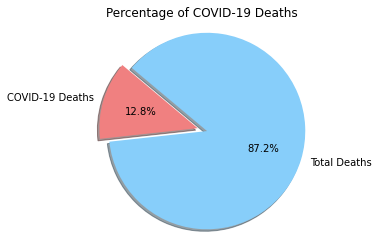

In [158]:
perc = round(sum_death_covid/sum_death * 100, 2)

labels = ["COVID-19 Deaths", "Total Deaths"]
colors = ["lightcoral", "lightskyblue"]
sizes = [12.84, 87.16]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percentage of COVID-19 Deaths")

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")


plt.show()

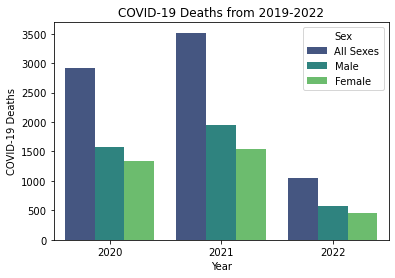

In [9]:
ax = sns.barplot(data = year_df, x="Year", y = "COVID-19 Deaths", hue = "Sex", ci=None, palette="viridis")
plt.title("COVID-19 Deaths from 2019-2022")
ax.set_xticklabels(["2020", "2021", "2022"])
plt.savefig("Resources/Images/COVIDdeathsYear&Gender.png")
plt.show()

#This plot shows that more men have died from COVID than women because
#the above line of code states there are an equal number of men and women in the dataframe.
#The most people died in 2021, but it was the only time we have an entire year's data.

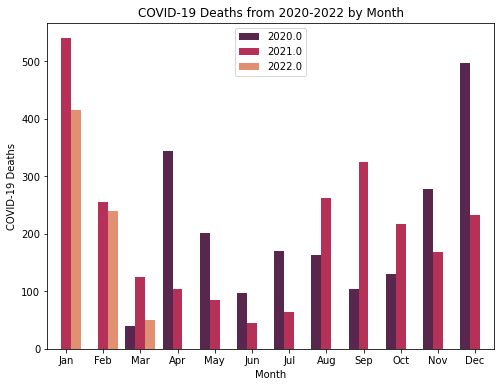

In [10]:
#The most COVID deaths occurred in Dec 2020 and Jan 2021. 
#From Feb - Jun 2021, there was a steady decline as vaccines became available.

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

f, ax = plt.subplots(figsize = (8,6))
ax = sns.barplot(data = month_df, x="Month", y = "COVID-19 Deaths", 
                 hue = "Year", ci=None, palette="rocket")
ax.set_xticklabels(months)
ax.set_title("COVID-19 Deaths from 2020-2022 by Month")
plt.legend(loc="upper center")
plt.savefig("Resources/Images/COVIDdeathsbyMonth.png")
plt.show()

In [11]:
covid_death_by_month = month_df.loc[:, ["Year", "Month", "COVID-19 Deaths"]]

covid_death_by_month = covid_death_by_month.set_index("Month")
covid_death_by_month


,Year,COVID-19 Deaths
Month,,
1.0,2020.0,5.0
1.0,2020.0,0.0
1.0,2020.0,0.0
1.0,2020.0,0.0
1.0,2020.0,0.0
...,...,...
4.0,2022.0,0.0
4.0,2022.0,0.0
4.0,2022.0,0.0


In [12]:
covid_death_by_year = month_df.loc[:, ["Year", "COVID-19 Deaths"]]
covid_death_by_year = covid_death_by_year.groupby("Year").sum()
covid_death_by_year

,COVID-19 Deaths
Year,
2020.0,3074824.0
2021.0,3681456.0
2022.0,1084186.0


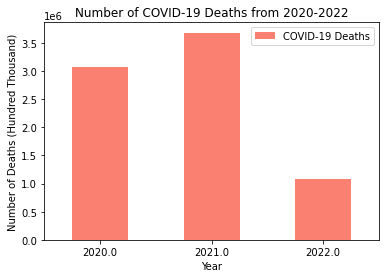

In [13]:
covid_death_by_year.plot(kind = "bar", rot=0, color = "salmon")
plt.ylabel("Number of Deaths (Hundred Thousand)")
plt.title("Number of COVID-19 Deaths from 2020-2022")
plt.savefig("Resources/Images/COVIDdeaths.png")
plt.show()

In [14]:
flu_death_by_year = month_df.loc[:, ["Year", "Influenza Deaths"]]
flu_death_by_year = flu_death_by_year.groupby("Year").sum()
flu_death_by_year

,Influenza Deaths
Year,
2020.0,59301.0
2021.0,4835.0
2022.0,4649.0


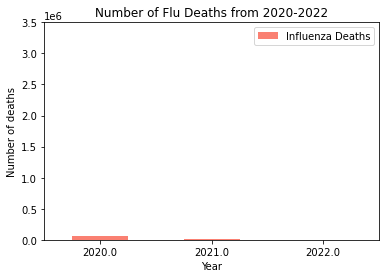

In [15]:
flu_death_by_year.plot(kind = "bar", rot=0, color = "salmon")
plt.ylabel("Number of deaths")
plt.title("Number of Flu Deaths from 2020-2022")
plt.ylim(0, 3500000)
plt.savefig("Resources/Images/Fludeaths.png")
plt.show()

In [16]:
pna_death_by_year = month_df.loc[:, ["Year", "Pneumonia Deaths"]]
pna_death_by_year = pna_death_by_year.groupby("Year").sum()
pna_death_by_year

,Pneumonia Deaths
Year,
2020.0,2812549.0
2021.0,3284795.0
2022.0,819891.0


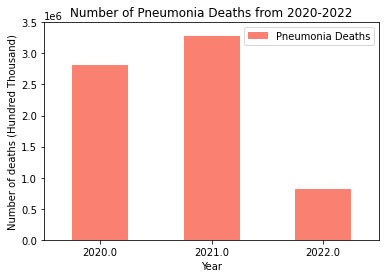

In [17]:
pna_death_by_year.plot(kind = "bar", rot=0, color = "salmon")
plt.ylabel("Number of deaths (Hundred Thousand)")
plt.title("Number of Pneumonia Deaths from 2020-2022")
plt.ylim(0, 3500000)
plt.savefig("Resources/Images/PNAdeaths.png")
plt.show()

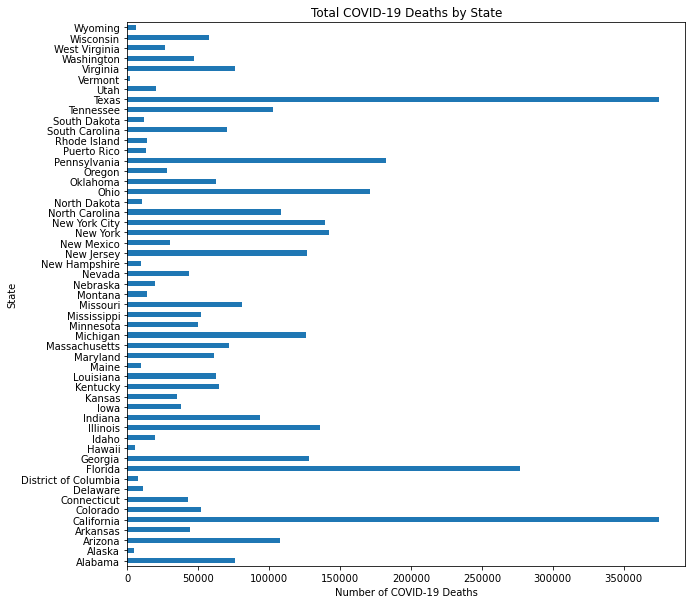

In [18]:
f, ax = plt.subplots(figsize = (10, 10))
states_df = year_df.loc[(health_df["State"] != "United States"), :]
states_df = states_df.groupby(["State"])["COVID-19 Deaths"].sum()
states_df.plot(kind="barh")
plt.title("Total COVID-19 Deaths by State")
plt.xlabel("Number of COVID-19 Deaths")
plt.savefig("Resources/Images/COVIDdeathbyState.png")
plt.show()

In [19]:
state = year_df["State"].unique()
year = year_df["Age Group"].unique()

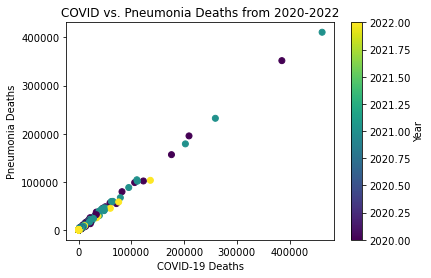

In [20]:
#Covid vs PNA deaths
plt.scatter(year_df['COVID-19 Deaths'],year_df['Pneumonia Deaths'], c=year_df['Year'])
clb = plt.colorbar()
plt.xlabel("COVID-19 Deaths")
plt.ylabel("Pneumonia Deaths")
plt.title("COVID vs. Pneumonia Deaths from 2020-2022")
clb.set_label("Year")
plt.savefig("Resources/Images/ScatterPNAvsCOVID.png")
plt.show()


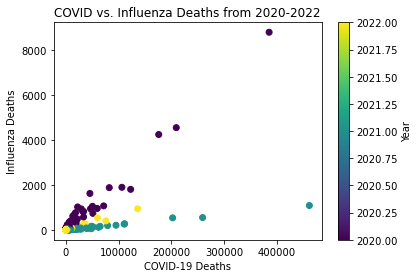

In [21]:
#Covid vs flu deaths
plt.scatter(year_df['COVID-19 Deaths'],year_df['Influenza Deaths'], c=year_df['Year'])
clb = plt.colorbar()
plt.xlabel("COVID-19 Deaths")
plt.ylabel("Influenza Deaths")
plt.title("COVID vs. Influenza Deaths from 2020-2022")
clb.set_label("Year")
plt.savefig("Resources/Images/ScatterFluvsCOVID.png")
plt.show()

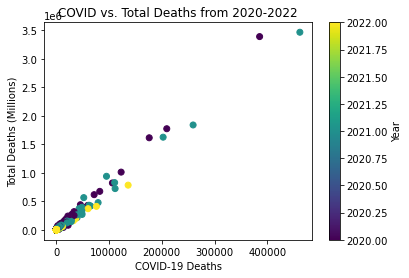

In [22]:
#Covid vs Total deaths
plt.scatter(year_df['COVID-19 Deaths'],year_df['Total Deaths'], c=year_df['Year'])
clb = plt.colorbar()
plt.xlabel("COVID-19 Deaths")
plt.ylabel("Total Deaths (Millions)")
plt.title("COVID vs. Total Deaths from 2020-2022")
clb.set_label("Year")
plt.savefig("Resources/Images/ScatterTotalvsCOVID.png")
plt.show()

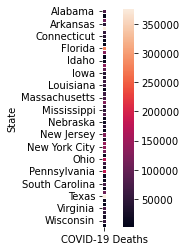

In [23]:
states_df = pd.DataFrame(states_df)
ax = sns.heatmap(states_df, linewidth=0.5,square=True)
plt.show()

In [24]:

# # states = states_df["State"]
# covid_deaths_state = states_df["COVID-19 Deaths"]
# covid_deaths_state = pd.DataFrame(covid_deaths_state)
# covid_deaths_state
# states_df.plot(kind="scatter")

In [25]:
total_df.describe()

,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
count,1582.000000,1.926000e+03,1536.000000,1665.000000,1146.000000,1.606000e+03
mean,4980.507585,3.186561e+04,4531.887370,2452.257658,73.716405,6.744638e+03
std,33744.826981,2.367573e+05,30241.499805,17099.926641,427.946071,4.600855e+04
min,0.000000,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00
25%,69.000000,4.000000e+02,76.000000,18.000000,0.000000,8.725000e+01
50%,490.500000,2.798000e+03,478.500000,215.000000,15.000000,6.475000e+02
75%,2444.000000,1.461800e+04,2203.250000,1106.000000,41.000000,3.302750e+03
max,983409.000000,7.638997e+06,865864.000000,509298.000000,10810.000000,1.349186e+06


The SEM value for the sample COVID-19 Deaths is 34.79237774210756


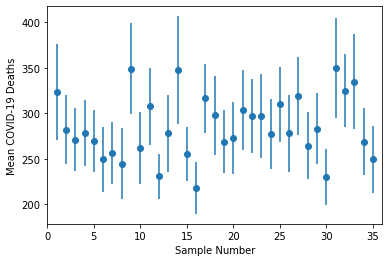

<Figure size 432x288 with 0 Axes>

In [26]:
new_month_df = month_df.dropna()
subset = new_month_df.sample(3000, random_state = 42)
sample = new_month_df.sample(3000)
print(f"The SEM value for the sample COVID-19 Deaths is {sem(sample['COVID-19 Deaths'])}")

# Create a sample set of 35, each with 3000 data points
covid_sample_set = [new_month_df.sample(3000) for x in range(0,35)]
means = [sample['COVID-19 Deaths'].mean() for sample in covid_sample_set]
standard_errors = [sem(sample['COVID-19 Deaths']) for sample in covid_sample_set]
x_axis = np.arange(0, len(covid_sample_set), 1) + 1

fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(covid_sample_set) + 1)

ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean COVID-19 Deaths")
plt.show()
plt.savefig("Resources/Images/SEMCOVID.png")

The SEM value for the sample Pneumonia Deaths is 39.39812486881578


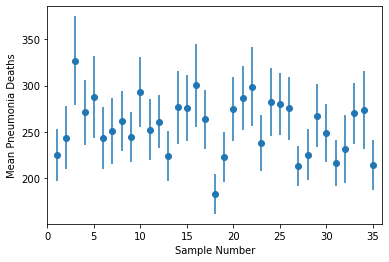

In [27]:
new_month_df = month_df.dropna()
subset = new_month_df.sample(3000, random_state = 42)
sample = new_month_df.sample(3000)
print(f"The SEM value for the sample Pneumonia Deaths is {sem(sample['Pneumonia Deaths'])}")

# Create a sample set of 35, each with 3000 data points
covid_sample_set = [new_month_df.sample(3000) for x in range(0,35)]
means = [sample['Pneumonia Deaths'].mean() for sample in covid_sample_set]
standard_errors = [sem(sample['Pneumonia Deaths']) for sample in covid_sample_set]
x_axis = np.arange(0, len(covid_sample_set), 1) + 1

fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(covid_sample_set) + 1)

ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean Pneumonia Deaths")
plt.savefig("Resources/Images/SEMPNA.png")
plt.show()

The SEM value for the sample Influenza Deaths is 0.8646563162000718


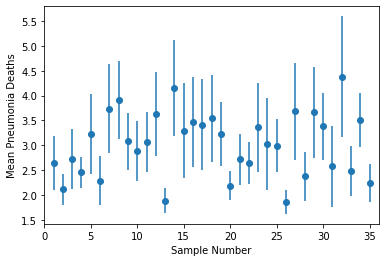

In [28]:
new_month_df = month_df.dropna()
subset = new_month_df.sample(3000, random_state = 42)
sample = new_month_df.sample(3000)
print(f"The SEM value for the sample Influenza Deaths is {sem(sample['Influenza Deaths'])}")

# Create a sample set of 35, each with 3000 data points
covid_sample_set = [new_month_df.sample(3000) for x in range(0,35)]
means = [sample['Influenza Deaths'].mean() for sample in covid_sample_set]
standard_errors = [sem(sample['Influenza Deaths']) for sample in covid_sample_set]
x_axis = np.arange(0, len(covid_sample_set), 1) + 1

fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(covid_sample_set) + 1)

ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean Pneumonia Deaths")
plt.savefig("Resources/Images/SEMFlu.png")
plt.show()

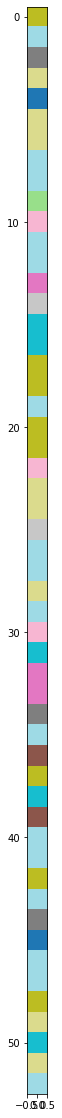

In [29]:
# data = [states, covid_deaths_state]
fig, ax = plt.subplots(figsize = (20,20))
plt.imshow(states_df, cmap='tab20_r', interpolation='nearest')
plt.show()